<a href="https://colab.research.google.com/github/ilkert08/K-Means-from-scratch/blob/main/K_Means_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries



In [72]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mpl_toolkits import mplot3d
from sklearn.utils import shuffle
from statistics import mode

# Distance Measuerment Functions

In [73]:
def euclideanDistance(list1, list2): #Returns euclidean disatnace between 2 nodes.
  sum = 0
  for i in range(len(list1)):
    dif = (list1[i] - list2[i]) ** 2
    sum += dif
  result = math.sqrt(sum)
  return result


# Import dataset



In [74]:
# import some data to play with
iris = datasets.load_iris()

limit = -1

x = iris.data[:]
y = iris.target[:]
labels = iris.target_names

# K Means

Class for clusters

In [75]:
class Cluster:

  def __init__(self, centroid):
    self._members = []
    self._indexes = []
    self._centroid = centroid
    self._className =  0

  def setClassName(self, name):
    self._className = name

  def getClassName(self):
      return str(self._className)

  def getMembers(self):
      return self._members

  def setMembers(self, value):
      self._members = value

  def clearMembers(self):
    self._members = []

  def getIndexes(self):
      return self._indexes

  def setIndexes(self, value):
      self._indexes = value

  def clearIndexes(self):
    self._indexes = []

  def getCentroid(self):
      return self._centroid

  def setCentroid(self, value):
      self._centroid = value

  def updateCentroid(self):
    newCentroid = [] 
    for i in range(len(self._members[0])):
      sum = 0
      for member in self._members:
        sum += member[i]
      newValue = sum / len(self._members)
      newCentroid.append(newValue)
      self._centroid = newCentroid

    


In [76]:
def assignClusters(x, k = 3, clusters = []):
  if len(x) == 0  or (len(y)!= 0  and len(x) != len(y)):
    raise ValueError('Check dataset, there is a problem!')
  


  for i in range(len(clusters)):
    cluster = clusters[i]
    cluster.clearIndexes()
    cluster.clearMembers()


  j = 0
  for data in x:
    minDistance = euclideanDistance(data, clusters[0].getCentroid())
    #print('-----------------------------------------------------------------------------------------')
    minIndex = 0
    for i in range(len(clusters)):
      cluster = clusters[i]
      tempDistance = euclideanDistance(data, cluster.getCentroid())
     # print("Temp Distance: " + str(tempDistance))

      if tempDistance < minDistance:
        minDistance = tempDistance
        minIndex = i
    #print('Min Index:' + str(minIndex))

    members = clusters[minIndex].getMembers()
    members.append(data)
 
    indexes = clusters[minIndex].getIndexes()
    indexes.append(j)

    clusters[minIndex].setMembers(members)
    clusters[minIndex].setIndexes(indexes)
    clusters[minIndex].updateCentroid()
  
    j+= 1
 
  return clusters    

def assignFirstClusters(x, k = 3):
  clusters = []
  print(len(clusters))
  for i in range(k):  # We define first k element as centroids.
    cluster = Cluster(x[i])
    clusters.append(cluster) 
  return clusters


In [77]:
def assignClasses(y, clusters):
  for cluster in clusters:
    tempList = []
    for indeks in cluster.getIndexes():
      tempList.append(y[indeks])
    className = mode(tempList)
    cluster.setClassName(className)




def kMeans(x, epochs = 100, k = 3):
  
  clusters = assignFirstClusters(x, k = k)

  for i in range(epochs):
    print("Epoch " + str(i + 1) + ": -------------------------------------------------------------------------")
    clusters = assignClusters(x, k = k, clusters = clusters)

  return clusters 

In [78]:
x, y = shuffle(x, y, random_state=0)
clusters = kMeans(x, epochs = 100, k = 3)
assignClasses(y, clusters)




predicted = list(range(len(y))) 
print(predicted)

for cluster in clusters:
  print('\n----------------------------------------------------------\n')
  for indeks in cluster.getIndexes():
    print(y[indeks])
    predicted[indeks] = (int(cluster.getClassName()))
  print('\nAssigned Class: ' + cluster.getClassName())  







0
Epoch 1: -------------------------------------------------------------------------
Epoch 2: -------------------------------------------------------------------------
Epoch 3: -------------------------------------------------------------------------
Epoch 4: -------------------------------------------------------------------------
Epoch 5: -------------------------------------------------------------------------
Epoch 6: -------------------------------------------------------------------------
Epoch 7: -------------------------------------------------------------------------
Epoch 8: -------------------------------------------------------------------------
Epoch 9: -------------------------------------------------------------------------
Epoch 10: -------------------------------------------------------------------------
Epoch 11: -------------------------------------------------------------------------
Epoch 12: -------------------------------------------------------------------------

# Visualize


Classification Reported: 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.86      0.88      0.87        50
   virginica       0.88      0.86      0.87        50

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150


Confusion Matrix: 



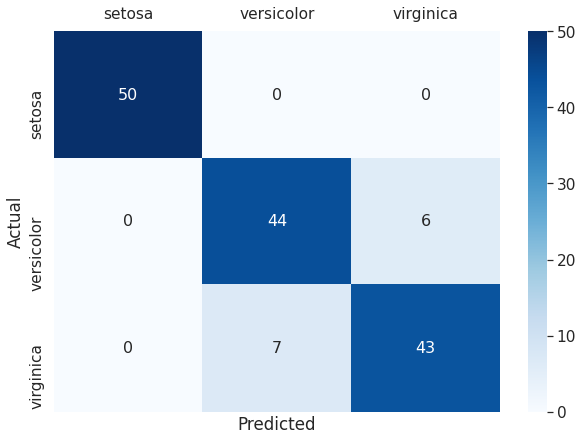


 3D plot of samples: 



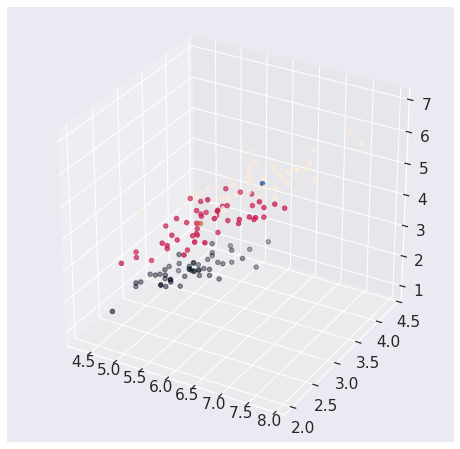

In [80]:
print('\nClassification Reported: \n')
print(classification_report(y, predicted, target_names=labels))

confMatrix = confusion_matrix(y, predicted)


df_cm = pd.DataFrame(confMatrix, columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
    
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})# font size
print('\nConfusion Matrix: \n')
plt.show()





print('\n 3D plot of samples: \n')




x1 = x[:,0]
x2 = x[:,1]
x3 = x[:,2]
colors = ['red','green','blue']





fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection ="3d")
ax.scatter3D(x1, x2, x3, c=y)

for cluster in clusters:
  centroid = cluster.getCentroid()
  ax.scatter3D(centroid[0], centroid[1], centroid[2])


#plt.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(colors))
#plt.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['yellow']))
#cb = ax.colorbar()


#loc = np.arange(0,max(y),max(y)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)